In [18]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from numpy.random import seed
seed(1)
tf.random.set_seed(1)
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from PIL import Image
from numpy import asarray
from helper import plot_history


In [19]:
# Initialise an image generator object
generator = ImageDataGenerator(rescale=1./255)

# Initialising number of data images
num_data = len(os.listdir('data/pavlos') + os.listdir('data/not_pavlos'))

# Read the image data from the directory using the generator object
img_generator = generator.flow_from_directory(directory="data/", color_mode='rgb', seed=1,
                                    batch_size=16, target_size=(150, 150), class_mode='binary')

# Print the target size i.e. the total dataset size
TARGET_SIZE = img_generator.target_size
print(f'Generator produces images of size {TARGET_SIZE} (with 3 color channels)')

# Print the batch size
BATCH_SIZE = img_generator.batch_size
print(f'Images are generated in batches of size {BATCH_SIZE}')


Found 100 images belonging to 2 classes.
Generator produces images of size (150, 150) (with 3 color channels)
Images are generated in batches of size 16


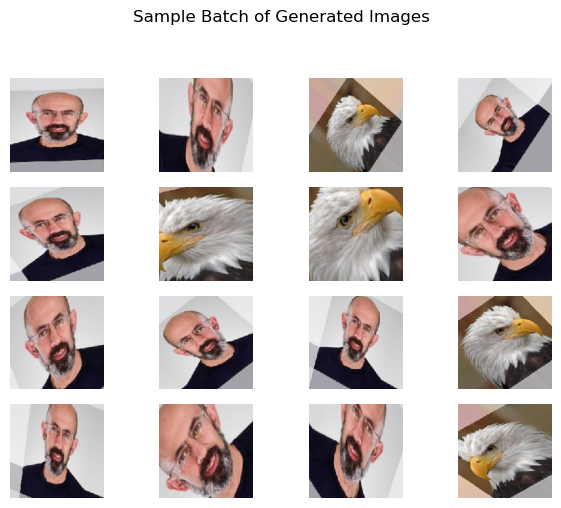

In [20]:
# Plotting a sample of the generated images 
sample_batch = img_generator.next()[0]
fig, ax = plt.subplots(4,4)
ax = ax.ravel()
for i, img in enumerate(sample_batch):
    ax[i].set_axis_off()
    ax[i].imshow(img)
plt.suptitle('Sample Batch of Generated Images', y=1.05)
plt.tight_layout()


### Feed-Forward Neural Network

Our first network will be a feed-forward neural network. The only layers with learned parameters we will be using are dense layers.

In [21]:
# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a feed-forward Neural Network
FFNN = Sequential()

# Specify a layer that takes the input with input shape
# the same as the size of the image defined during image generation
# Remember to take into account that the image has 3 channels
FFNN.add(Input(shape=(150, 150, 3), batch_size=BATCH_SIZE))

# Add a flatten layer to enable FFNN to process images
FFNN.add(Flatten())

# Specify a list of the number of nodes for each dense layer
ffnn_filters = [16,16,16,16,16]

# Add dense layers for the number of nodes in ffnn_filters with ReLU activation
for n_nodes in ffnn_filters:
    FFNN.add(Dense(n_nodes, activation='relu'))

# Add the final dense layer with 1 output node to differentiate 
# between the two classes and sigmoid activation
FFNN.add(Dense(1, activation='sigmoid'))

# Compile the model with accuracy as the metric and adam optimizer
FFNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [22]:
# Print a summary of the model and observe the total number of parameters
FFNN.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (16, 67500)               0         
                                                                 
 dense_8 (Dense)             (16, 16)                  1080016   
                                                                 
 dense_9 (Dense)             (16, 16)                  272       
                                                                 
 dense_10 (Dense)            (16, 16)                  272       
                                                                 
 dense_11 (Dense)            (16, 16)                  272       
                                                                 
 dense_12 (Dense)            (16, 16)                  272       
                                                                 
 dense_13 (Dense)            (16, 1)                  

In [23]:
# Train the model
FFNN_history = FFNN.fit(
        img_generator,
        steps_per_epoch=num_data// BATCH_SIZE,
        epochs=5, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)
        

Epoch 1/5
6/6 [==============================] - 1s 33ms/step - loss: 0.9895 - accuracy: 0.4688 - val_loss: 0.7743 - val_accuracy: 0.3125
Epoch 2/5
6/6 [==============================] - 0s 22ms/step - loss: 0.5928 - accuracy: 0.6667 - val_loss: 0.4078 - val_accuracy: 0.9375
Epoch 3/5
6/6 [==============================] - 0s 19ms/step - loss: 0.3204 - accuracy: 0.9271 - val_loss: 0.1639 - val_accuracy: 1.0000
Epoch 4/5
6/6 [==============================] - 0s 19ms/step - loss: 0.1697 - accuracy: 0.9792 - val_loss: 0.0716 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 0s 23ms/step - loss: 0.0918 - accuracy: 0.9896 - val_loss: 0.1302 - val_accuracy: 0.9375


### ⏸ Enter the number of parameters in the given FFNN architecture.

In [24]:
### edTest(test_chow1) ###
# Enter the answer by typing in a number in the space provided
answer1 = '405047'


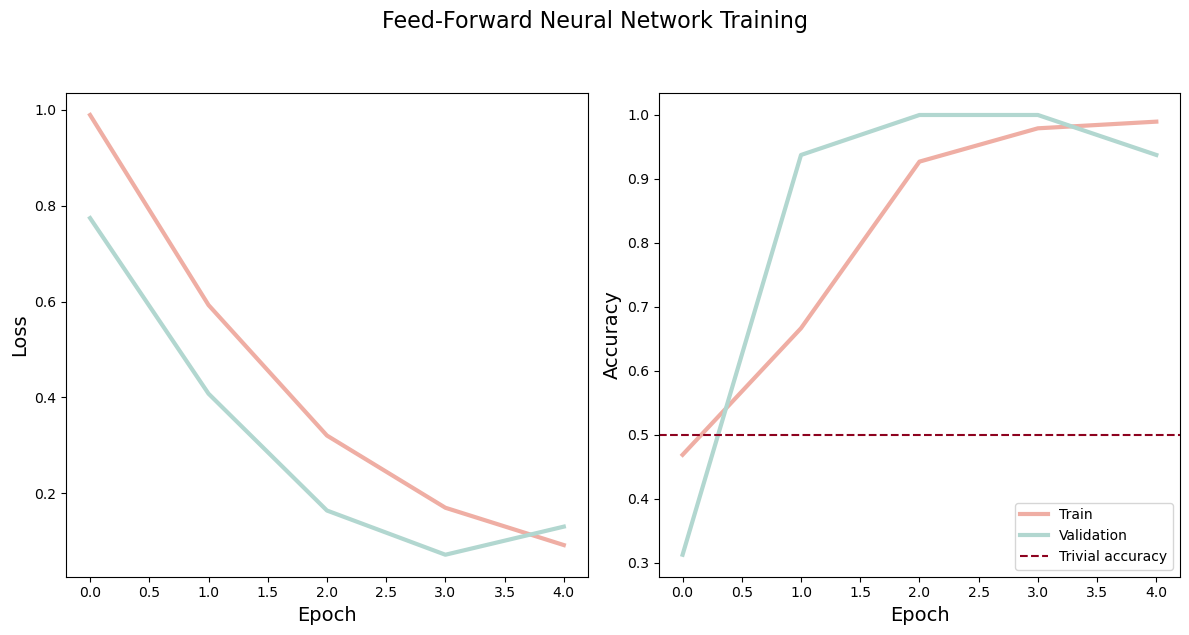

In [25]:
# Use the plot history function from the helper file to plot the data
plot_history(FFNN_history, 'Feed-Forward Neural Network')


In [26]:
### edTest(test_ffnn_acc) ###

# Evaluate your model
FFNN_loss, FFNN_acc = FFNN.evaluate(img_generator, steps=2)
print(f'FFNN Accuracy: {FFNN_acc}')


2/2 [==============================] - 0s 28ms/step - loss: 0.1672 - accuracy: 0.9688
FFNN Accuracy: 0.96875


### ⏸ Alter the network architecture by increasing the number of nodes and/or layers. Enter the number of parameters of the network that gives a validation accuracy of above 80%.

In [27]:
### edTest(test_chow2) ###
# Enter the answer by typing in a number in the space provided
answer2 = '14400497'


### Convolutional Neural Network

In [28]:
### edTest(test_cnn_count_param) ###

# Fixing the random seed
seed(1)
tf.random.set_seed(1)

# Creating a CNN
CNN = Sequential()

# Add a layer to take the input with shape (150,150,3)
CNN.add(Conv2D(8, (3,3), strides=2, activation='relu', input_shape=(150,150,3)))

# Specify a list of the number of filters for each convolutional layer
cnn_filters = [8,8,8,8]

# Add convolutional layers with number of filters in cnn_filters
# with kernel size as 3, stride of 2 and relu activation
for n_filters in cnn_filters:
    CNN.add(Conv2D(n_filters, (3,3), strides=2, activation='relu'))

# Add the flatten layer between the CNN and dense layer
CNN.add(Flatten())

# Add a dense layer with 64 nodes and relu activation
CNN.add(Dense(64, activation='relu'))
 
# Specify the output layer with sigmoid activation and one node
CNN.add(Dense(1, activation='sigmoid'))
 
# Compile the model with accuracy as the metric and adam optimizer
CNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [29]:
# Print a summary of the model and observe the total number of parameters
CNN.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 74, 74, 8)         224       
                                                                 
 conv2d_6 (Conv2D)           (None, 36, 36, 8)         584       
                                                                 
 conv2d_7 (Conv2D)           (None, 17, 17, 8)         584       
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 8)           584       
                                                                 
 flatten_3 (Flatten)         (None, 72)                0         
                                                                 
 dense_14 (Dense)            (None, 64)               

### ⏸ Enter the number of parameters in the given CNN architecture.


In [30]:
### edTest(test_chow3) ###

# Enter the answer by typing in a number in the space provided
answer3 = '7297'


In [31]:
# Fit the model on the image generator
CNN_history = CNN.fit(
        img_generator,
        steps_per_epoch=num_data // BATCH_SIZE,
        epochs=5, shuffle=False, workers=0,
        validation_data=img_generator,
        validation_steps=num_data*0.25// BATCH_SIZE)
        

Epoch 1/5
6/6 [==============================] - 1s 48ms/step - loss: 0.6886 - accuracy: 0.6042 - val_loss: 0.6825 - val_accuracy: 0.5000
Epoch 2/5
6/6 [==============================] - 0s 21ms/step - loss: 0.6762 - accuracy: 0.5000 - val_loss: 0.6761 - val_accuracy: 0.4375
Epoch 3/5
6/6 [==============================] - 0s 17ms/step - loss: 0.6516 - accuracy: 0.5208 - val_loss: 0.6117 - val_accuracy: 0.7500
Epoch 4/5
6/6 [==============================] - 0s 18ms/step - loss: 0.5931 - accuracy: 0.6979 - val_loss: 0.4562 - val_accuracy: 1.0000
Epoch 5/5
6/6 [==============================] - 0s 21ms/step - loss: 0.4884 - accuracy: 0.9062 - val_loss: 0.3685 - val_accuracy: 0.9375


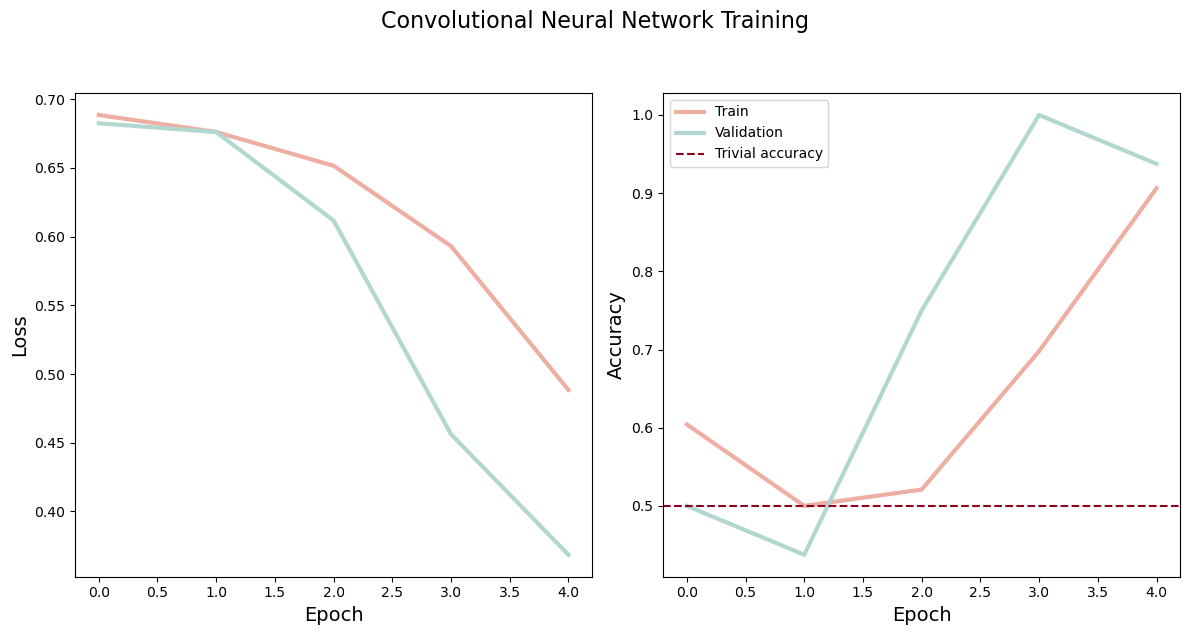

In [32]:
# Plot the history of the model
plot_history(CNN_history, 'Convolutional Neural Network')


In [33]:
### edTest(test_cnn_acc) ###

# Evaluate the model on the entire data
CNN_loss, CNN_acc = CNN.evaluate(img_generator, steps=2)
print(f'CNN Test Accuracy: {CNN_acc}')


2/2 [==============================] - 0s 10ms/step - loss: 0.3636 - accuracy: 0.9375
CNN Test Accuracy: 0.9375


### ⏸ Remove the last convolution layer in the Convolution Neural Network defined above. How does this affect the number of parameters?

#### A. The number of parameters decrease.
#### B. The number of parameters increase.
#### C. The number of parameters remains the same. 


In [34]:
### edTest(test_chow4) ###

# Enter the answer by typing in a number in the space provided
answer4 = 'B'
